# Поиск лучшего классификатора

В данном файле будет произведено исследование по определению модели классификатора, который покажет лучший результат

Результат будет оцениваться по метрике f1 weighted

В рамках задачи нам важен по сути класс 1 по той причине, что страховой компании интересны только случаи, когда клиент будет брать страховку, поэтому нам важно максимизировать точность предсказаний именно по этому классу

Для обучения и тестирования берём датасеты ```train_final.csv``` и ```test_final.csv```, которые были получены в ```EDA.ipynb```

In [1]:
import pandas as pd
from sklearn.metrics import f1_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import pickle
from sklearn.metrics import classification_report

In [2]:
train = pd.read_csv("train_final.csv")
test = pd.read_csv("test_final.csv")

In [3]:
x_train, y_train = train.drop(columns=["Response"]), train["Response"]
x_test, y_test = test.drop(columns=["Response"]), test["Response"]

Возьмём ряд классификаторов из sklearn

(изначально предполагалось использовать все классификаторы для проверки, но последние три из списка не остановили обучение за обозревамое время, а остальные, которые не имели возможности балансировки классов, не показали должного результата)

In [4]:
# Объявление классификаторов
lr = LogisticRegression(max_iter=1000)#, class_weight="balanced")
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()#class_weight="balanced")
gb = GradientBoostingClassifier()
kn = KNeighborsClassifier(n_neighbors=5)
svm = SVC()#class_weight="balanced")
nb = GaussianNB()

classifiers = {
    "Logistic_Regression": lr,
    "Decision_Tree": dt,
    "Random_Forest": rf,
    "Gradient_Boosting": gb,
    # "K-Neighbors": kn,
    # "SVM": svm,
    # "Naive_Bayes": gb
}

for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    print(f"Модель: {name}")
    print(classification_report(y_test, y_pred))

Модель: Logistic_Regression


c:\Users\roman\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\roman\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\roman\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.88      1.00      0.93   5705020
           1       0.00      0.00      0.00    799778

    accuracy                           0.88   6504798
   macro avg       0.44      0.50      0.47   6504798
weighted avg       0.77      0.88      0.82   6504798

Модель: Decision_Tree


c:\Users\roman\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\roman\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\roman\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.88      1.00      0.93   5705020
           1       0.00      0.00      0.00    799778

    accuracy                           0.88   6504798
   macro avg       0.44      0.50      0.47   6504798
weighted avg       0.77      0.88      0.82   6504798

Модель: Random_Forest


c:\Users\roman\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\roman\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\roman\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.88      1.00      0.93   5705020
           1       0.00      0.00      0.00    799778

    accuracy                           0.88   6504798
   macro avg       0.44      0.50      0.47   6504798
weighted avg       0.77      0.88      0.82   6504798

Модель: Gradient_Boosting


c:\Users\roman\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\roman\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.88      1.00      0.93   5705020
           1       0.00      0.00      0.00    799778

    accuracy                           0.88   6504798
   macro avg       0.44      0.50      0.47   6504798
weighted avg       0.77      0.88      0.82   6504798



c:\Users\roman\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Получаются нулевые метрики у класса 1... Проблема может скрываться в том, что классы не сбалансированы

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

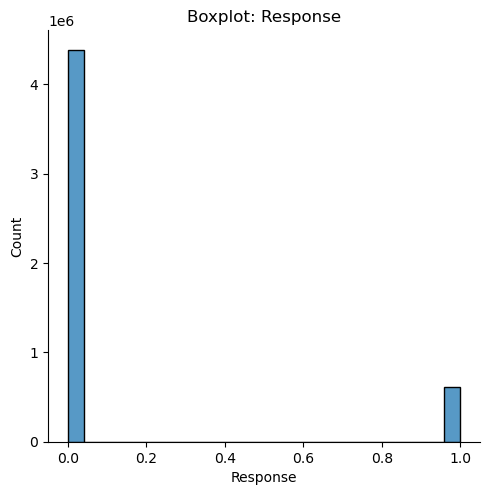

In [6]:
sns.displot(train["Response"])
plt.title(f'Boxplot: {"Response"}')
plt.show()

Попробуем сбалансировать классы, для этого можно указать параметр в некоторых классификаторах. Возьмём только те, где этот параметр имеется

SVM за адекватное время не посчитает, согласно документации sklearn время работы растёт квадратично от размера данных

In [17]:
lr = LogisticRegression(max_iter=1000, class_weight="balanced")
rf = RandomForestClassifier(class_weight="balanced")
svm = SVC(class_weight="balanced")
classifiers = {
    "Logistic_Regression": lr,
    "Random_Forest": rf,
}

for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    print(f"Модель: {name}")
    print(classification_report(y_test, y_pred))
    with open(f"{name}.pkl", "wb") as file:
        pickle.dump(clf, file)

Модель: Logistic_Regression
              precision    recall  f1-score   support

           0       1.00      0.59      0.74   5705020
           1       0.25      0.98      0.40    799778

    accuracy                           0.64   6504798
   macro avg       0.62      0.79      0.57   6504798
weighted avg       0.90      0.64      0.70   6504798

Модель: Random_Forest
              precision    recall  f1-score   support

           0       0.98      0.69      0.81   5705020
           1       0.29      0.89      0.43    799778

    accuracy                           0.72   6504798
   macro avg       0.63      0.79      0.62   6504798
weighted avg       0.89      0.72      0.76   6504798



Попробуем улучшить результат при помощи SMOTE, который создаст новые данные основе имеющихся, чтобы выравнять классы

In [4]:
from imblearn.over_sampling import SMOTE

In [5]:
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [6]:
lr = LogisticRegression(max_iter=1000, class_weight="balanced")
rf = RandomForestClassifier(class_weight="balanced")
classifiers = {
    "Logistic_Regression": lr,
    "Random_Forest": rf,
}

for name, clf in classifiers.items():
    clf.fit(X_train_resampled, y_train_resampled)
    y_pred = clf.predict(x_test)
    
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    print(f"Модель: {name}")
    print(classification_report(y_test, y_pred))
    with open(f"{name}_smote.pkl", "wb") as file:
        pickle.dump(clf, file)

Модель: Logistic_Regression
              precision    recall  f1-score   support

           0       1.00      0.59      0.74   5705020
           1       0.25      0.98      0.40    799778

    accuracy                           0.64   6504798
   macro avg       0.62      0.79      0.57   6504798
weighted avg       0.90      0.64      0.70   6504798

Модель: Random_Forest
              precision    recall  f1-score   support

           0       0.98      0.69      0.81   5705020
           1       0.29      0.89      0.43    799778

    accuracy                           0.72   6504798
   macro avg       0.63      0.79      0.62   6504798
weighted avg       0.89      0.72      0.76   6504798



На тех же моделях результат тот же, попробуем те, которые не умеют самостоятельно выравнивать дисбаланс

In [ ]:
dt = DecisionTreeClassifier()
gb = GradientBoostingClassifier()

classifiers = {
    "Decision_Tree": dt,
    "Gradient_Boosting": gb,
    "Naive_Bayes": gb
}


for name, clf in classifiers.items():
    clf.fit(X_train_resampled, y_train_resampled)
    y_pred = clf.predict(x_test)
    
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    print(f"Модель: {name}")
    print(classification_report(y_test, y_pred))
    with open(f"{name}_smote.pkl", "wb") as file:
        pickle.dump(clf, file)

Модель: Decision_Tree
              precision    recall  f1-score   support

           0       0.98      0.69      0.81   5705020
           1       0.29      0.89      0.43    799778

    accuracy                           0.72   6504798
   macro avg       0.63      0.79      0.62   6504798
weighted avg       0.89      0.72      0.76   6504798

Модель: Gradient_Boosting
              precision    recall  f1-score   support

           0       0.98      0.69      0.81   5705020
           1       0.29      0.89      0.43    799778

    accuracy                           0.72   6504798
   macro avg       0.63      0.79      0.62   6504798
weighted avg       0.89      0.72      0.76   6504798



Лучше 0.76 выбить не удалось. Возьмём случайный лес как лучший вариант и попробуем его улучшить путём подбора лучших параметров через ```GridSearchCV```

In [20]:
with open("Random_Forest.pkl", "rb") as f:
    clf = pickle.load(f)
print(clf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


Зададим следующую сетку параметров:

In [4]:
from sklearn.model_selection import GridSearchCV

In [9]:
#протестируем балансирующий классификатор
clf = RandomForestClassifier(class_weight="balanced")
gr_space = {
    'max_depth': [3,5],
    'n_estimators': [100],
    'max_features': [10, 20],
    'min_samples_leaf': [1, 2]
}
grid = GridSearchCV(clf, gr_space, scoring="f1_weighted", verbose=3, cv=5,)
model_grid = grid.fit(x_train, y_train)

print('Лучшие гиперпараметры '+str(model_grid.best_params_))
print('Лучший показатель: ' + str(model_grid.best_score_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.700 total time= 1.7min
[CV 2/5] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.701 total time= 1.7min
[CV 3/5] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.701 total time= 1.7min
[CV 4/5] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.700 total time= 1.7min
[CV 5/5] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.700 total time= 1.7min
[CV 1/5] END max_depth=3, max_features=10, min_samples_leaf=2, n_estimators=100;, score=0.700 total time= 1.7min
[CV 2/5] END max_depth=3, max_features=10, min_samples_leaf=2, n_estimators=100;, score=0.701 total time= 1.7min
[CV 3/5] END max_depth=3, max_features=10, min_samples_leaf=2, n_estimators=100;, score=0.701 total time= 1.7min
[CV 4/5] END max_depth=3, max_featur

In [11]:
best_forest_balanced = grid.best_estimator_
y_pred = best_forest_balanced.predict(x_test)
print(classification_report(y_test, y_pred))
with open("Random_Forest_best_balanced.pkl", "wb") as f:
    pickle.dump(best_forest_balanced, f)

              precision    recall  f1-score   support

           0       0.98      0.69      0.81   5705020
           1       0.29      0.89      0.43    799778

    accuracy                           0.72   6504798
   macro avg       0.63      0.79      0.62   6504798
weighted avg       0.89      0.72      0.76   6504798



Результат идентичен предыдущим вариантам, так что возьмём его за основу как финальную версию и переименуем в ```model.pkl```